In [1]:
from matplotlib import pyplot as plt

In [2]:
from quick_setup import traj, start, end

In [3]:
from spice_segmenter.trajectory_properties import Distance,PhaseAngle
from spice_segmenter.occultation import Occultation, OccultationTypes

# define some properties of the trajectory
jup_distance = Distance("JUICE", "JUPITER", light_time_correction= "LT+S") 
io_distance = Distance("JUICE", "IO", light_time_correction="LT+S")

# define the occultation property
io_occultation = Occultation("JUICE", "JUPITER", "IO", light_time_correction="LT+S") # when io is occulted by jupiter as seen by juice


# phase angle
io_jup_phase_angle = PhaseAngle("JUICE", "IO", "SUN", light_time_correction="LT+S")

In [4]:
# each propertu is associated to an unit:
print(io_occultation.unit)
print(jup_distance.unit)
print(io_jup_phase_angle.unit)

dimensionless
kilometer
radian


In [5]:
from planetary_coverage import et, utc

In [6]:
t1 = et("2024-01-01T00:00:00")

print(io_occultation(t1))
print(jup_distance(t1))
print(io_jup_phase_angle(t1))

NONE
699173415.1355487
0.1694771513364266


In [7]:
# now we can evaluate the properties



print(f"{jup_distance} at {utc(t1)} = {jup_distance(t1)} {jup_distance.unit}")
print(f"{io_occultation} at {utc(t1)} = {io_occultation(t1)} {io_occultation.unit}")
print(f"{io_jup_phase_angle} at {utc(t1)} = {io_jup_phase_angle(t1)} {io_jup_phase_angle.unit}")

Distance of JUPITER from JUICE at 2024-01-01T00:00:00.000 = 699173415.1355487 kilometer
Occultation of IO by JUPITER, as seen by JUICE at 2024-01-01T00:00:00.000 = NONE dimensionless
Phase Angle of IO with respect to SUN as seen from JUICE at 2024-01-01T00:00:00.000 = 0.1694771513364266 radian


In [8]:
print(OccultationTypes.FULL.value)
print(OccultationTypes.PARTIAL.value)
print(OccultationTypes.ANNULAR.value)

1
2
3


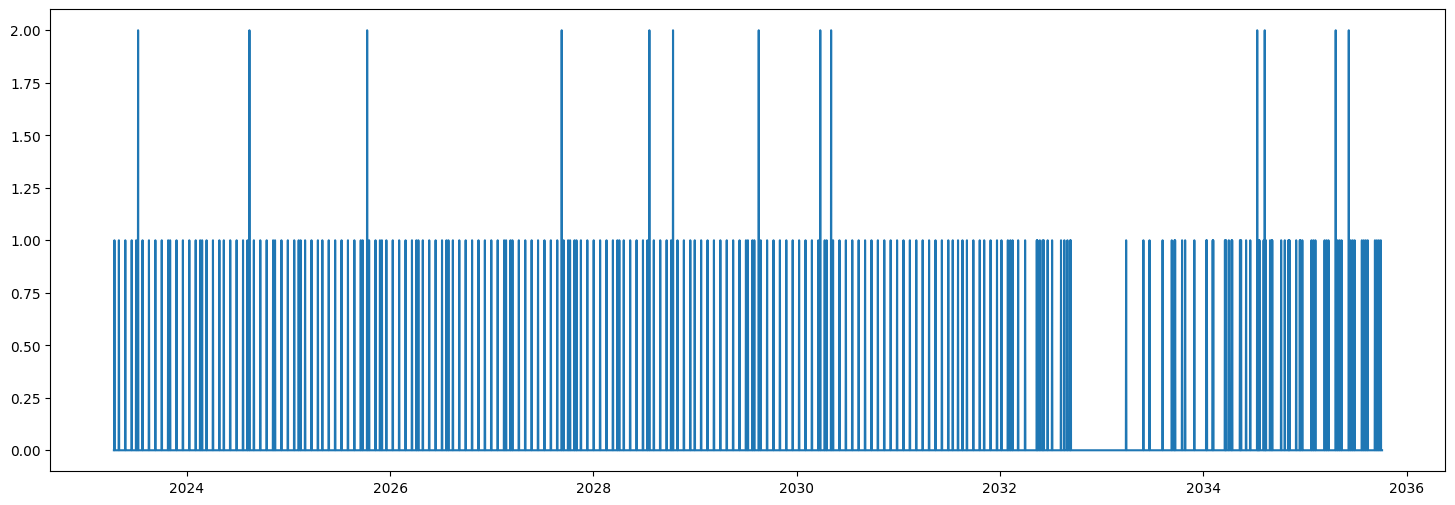

In [9]:
# properties can be evaluated over arrays (not particularly efficient, but useful for testing)
status = io_occultation(traj.ets)
plt.figure(figsize=(18,6))

plt.plot(traj.utc, [s.value for s in status])

In [10]:
from loguru import logger as log
import sys
log.remove()
log.enable('spice_segmenter')
log.add(sys.stderr, level='DEBUG')

2

In [11]:
from spice_segmenter import Constraint, Constant

In [12]:
Constraint(io_distance, '2 m', '>=')

2024-01-15 12:49:49.343 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Distance of IO from JUICE >= 2 m) for compatibility
2024-01-15 12:49:49.345 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.trajectory_properties.Distance'>
2024-01-15 12:49:49.347 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:451 - Right type is <class 'str'>
2024-01-15 12:49:49.352 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:454 - Left side of constraint (Distance of IO from JUICE >= 2 m) is not a constraint or property. Assuming is a constant.


(Distance of IO from JUICE >= 2 meter)

In [13]:
io_distance > '2m'

2024-01-15 12:49:49.372 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Distance of IO from JUICE > 2 meter) for compatibility
2024-01-15 12:49:49.377 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.trajectory_properties.Distance'>
2024-01-15 12:49:49.379 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:451 - Right type is <class 'spice_segmenter.trajectory_properties.ScalarConstant'>


(Distance of IO from JUICE > 2 meter)

In [14]:
io_occultation == 2

2024-01-15 12:49:49.398 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Occultation of IO by JUPITER, as seen by JUICE == 2) for compatibility
2024-01-15 12:49:49.408 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.occultation.Occultation'>
2024-01-15 12:49:49.409 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:451 - Right type is <class 'spice_segmenter.trajectory_properties.ScalarConstant'>


(Occultation of IO by JUPITER, as seen by JUICE == 2)

In [15]:
# properties  can be used to create constraints:
io_occultation_constraint = (io_occultation == OccultationTypes.FULL)

print(io_occultation_constraint)

2024-01-15 12:49:49.430 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Occultation of IO by JUPITER, as seen by JUICE == FULL) for compatibility
2024-01-15 12:49:49.433 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.occultation.Occultation'>
2024-01-15 12:49:49.435 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:451 - Right type is <class 'spice_segmenter.trajectory_properties.ScalarConstant'>


(Occultation of IO by JUPITER, as seen by JUICE == FULL)


In [16]:
type(io_occultation)

spice_segmenter.occultation.Occultation

[False False  True ... False False False]


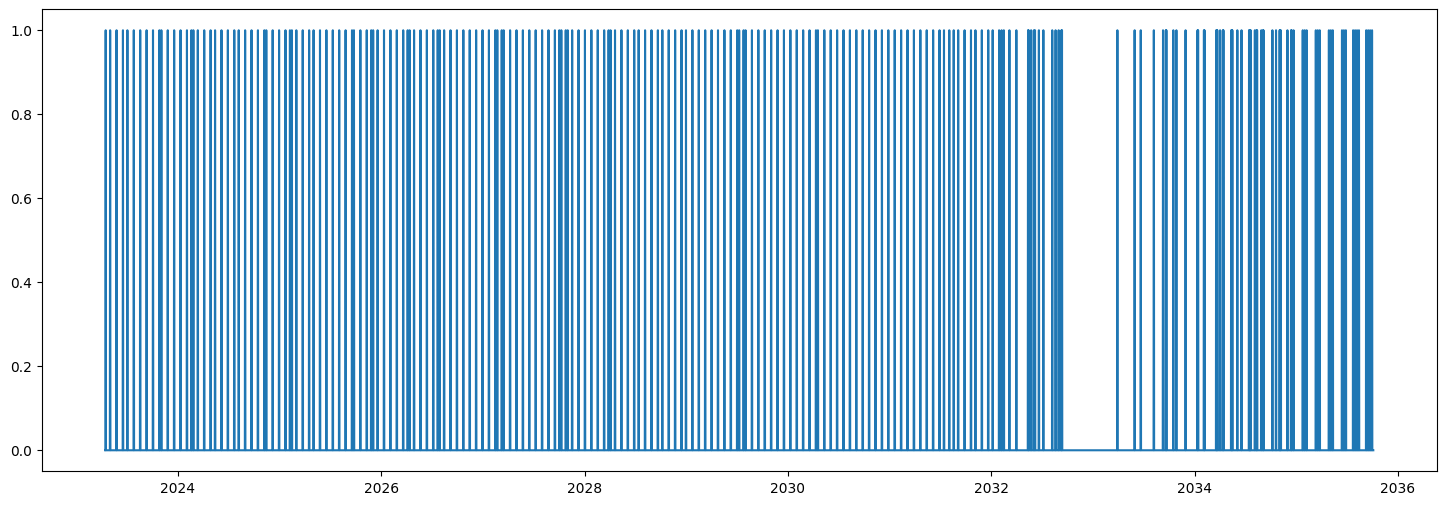

In [17]:
# also constraints can be evaluated over arrays
status = io_occultation_constraint(traj.ets)
print(status) # but they return a boolean array

plt.figure(figsize=(18,6))
plt.plot(traj.utc, status)

In [18]:
# composite constraints can be created
c = (io_jup_phase_angle > "5 deg" )  & (io_jup_phase_angle < "8 deg" ) & \
    (jup_distance < "800000000.0 km") & (io_occultation == OccultationTypes.ANY)

2024-01-15 12:49:51.797 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Phase Angle of IO with respect to SUN as seen from JUICE > 5 degree) for compatibility
2024-01-15 12:49:51.800 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.trajectory_properties.PhaseAngle'>
2024-01-15 12:49:51.801 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:451 - Right type is <class 'spice_segmenter.trajectory_properties.ScalarConstant'>
2024-01-15 12:49:51.803 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:449 - Checking constraint (Phase Angle of IO with respect to SUN as seen from JUICE < 8 degree) for compatibility
2024-01-15 12:49:51.805 | DEBUG    | spice_segmenter.trajectory_properties:__attrs_post_init__:450 - Left type is <class 'spice_segmenter.trajectory_properties.PhaseAngle'>
2024-01-15 12:49:51.806 | DEBUG    | spice_segmenter.traje

In [19]:
# render the tree of constraints
c.render_tree()

AND
├── AND
│   ├── AND
│   │   ├── (Phase Angle of IO with respect to SUN as seen from JUICE > 5 degree)
│   │   └── (Phase Angle of IO with respect to SUN as seen from JUICE < 8 degree)
│   └── (Distance of JUPITER from JUICE < 800000000.0 kilometer)
└── (Occultation of IO by JUPITER, as seen by JUICE == ANY)


In [20]:
status = c(traj.ets) # compute the status of the constraint over the trajectory

fig, ax = plt.subplots(figsize=(18,4))
ax.plot(traj.utc, status, label='OCC status')

ax.set_ylim(-1, 3)

ax1 = plt.gca()


ax2 = ax1.twinx()

a = ax2.plot(traj.utc, traj.dist, label="distance", color="red")

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.03))

b = ax3.plot(traj.utc, traj.phase, label="phase angle", color="green")

plt.legend(a+b, [l.get_label() for l in a+b])


2024-01-15 12:49:51.927 | WARNING  | spice_segmenter.trajectory_properties:__call__:530 - Comparing radian with degree. This is not recommended. Will attempt automatic conversion.
2024-01-15 12:49:53.554 | WARNING  | spice_segmenter.trajectory_properties:__call__:530 - Comparing radian with degree. This is not recommended. Will attempt automatic conversion.


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/luca/data/Code/spice_segmenter.git/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_873392/3414624346.py", line 1, in <module>
    status = c(traj.ets) # compute the status of the constraint over the trajectory
             ^^^^^^^^^^^
  File "/home/luca/data/Code/spice_segmenter.git/src/spice_segmenter/trajectory_properties.py", line 548, in __call__
    return np.array(eval(q), dtype=bool)
                    ^^^^^^^
  File "<string>", line 1, in <module>
  File "/home/luca/data/Code/spice_segmenter.git/src/spice_segmenter/trajectory_properties.py", line 548, in __call__
    return np.array(eval(q), dtype=bool)
                    ^^^^^^^
  File "<string>", line 1, in <module>
  File "/home/luca/data/Code/spice_segmenter.git/src/spice_segmenter/trajectory_properties.py", line 548, in __call__
    return np.array(eval

In [ ]:
# if we want to get the exact intervals, better use a solver and find the precise start and end

from spice_segmenter.spice_window import SpiceWindow
import numpy as np

shift = np.timedelta64(1, "D")
w = SpiceWindow() # a window from start to end of the trajectory


w.add_interval(start+shift, end-shift) # add the interval from start to end of the trajectory

w

In [ ]:
result = c.solve(w)
result

In [ ]:
status = c(traj.ets)

fig, ax = plt.subplots(figsize=(18,4))

result.plot(ax=ax, color="red", label="constraint", alpha=0.3) # plot the results

ax.plot(traj.utc, status)

ax.set_ylim(-1, 3)

ax1 = plt.gca()


ax2 = ax1.twinx()

a = ax2.plot(traj.utc, traj.dist, label="distance", color="red")

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.03))

b = ax3.plot(traj.utc, traj.phase, label="phase angle", color="green")

plt.legend(a+b, [l.get_label() for l in a+b])

In [ ]:
result.to_datetimerange() # as datetimerange

In [ ]:
result.to_pandas() # as pandas dataframe

In [ ]:
result.to_juice_core_csv("result.csv") # as juice core csv